In [329]:
from neural_network import graphs, load_data, models, training_loop, validation_loop, evaluate_model
import torch
import torch.nn as nn
import torch.nn.functional as F
import importlib


importlib.reload(graphs)
importlib.reload(load_data)
importlib.reload(models)
importlib.reload(training_loop)
importlib.reload(validation_loop)
importlib.reload(evaluate_model)



<module 'neural_network.evaluate_model' from 'C:\\Users\\Caleb Vourazeris\\Documents\\Code\\Python\\spaceX\\neural_network-project\\neural_network\\evaluate_model.py'>

In [330]:
# Pick a manual seed for randomization
torch.manual_seed(41)

In [331]:
# Define location of data
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

In [332]:
my_df = load_data.download_data(url)

In [333]:
# Split data into train, test, and validate
train, validate, test = load_data.split_data(my_df)

In [334]:
batch_size = 5

In [335]:
# Create Training and testing dataset
train_dataloader = load_data.create_dataloader(train, batch_size)
validate_dataloader = load_data.create_dataloader(validate, batch_size)
test_dataloader = load_data.create_dataloader(test, batch_size)

C:\Users\Caleb Vourazeris\Documents\Code\Python\spaceX\neural_network-project\neural_network\load_data.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['variety'] = dataframe['variety'].replace('Virginica', 2)
C:\Users\Caleb Vourazeris\Documents\Code\Python\spaceX\neural_network-project\neural_network\load_data.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['variety'] = dataframe['variety'].replace('Virginica', 2)
C:\Users\Caleb Vourazeris\Documents\Code\Python\spaceX\neural_network-project\neural_net

In [ ]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

In [337]:
num_epochs = 100

In [338]:
num_models = 3

train_losses_list = []
validate_losses_list = []

for i in range(num_models):
    model = models.create_model()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    model, train_losses, validate_losses = training_loop.train_model(model, train_dataloader, validate_dataloader, criterion, optimizer, num_epochs)
    train_losses_list.append(train_losses)
    validate_losses_list.append(validate_losses)

Epoch: 0 Training Loss: 1.1205674231052398 Validation Loss: 1.119884967803955
Epoch: 1 Training Loss: 1.1038277983665465 Validation Loss: 1.1055928468704224
Epoch: 2 Training Loss: 1.0912112712860107 Validation Loss: 1.0952643156051636
Epoch: 3 Training Loss: 1.08059965968132 Validation Loss: 1.0871214866638184
Epoch: 4 Training Loss: 1.0695654451847076 Validation Loss: 1.0839051008224487
Epoch: 5 Training Loss: 1.0567214131355285 Validation Loss: 1.0790843963623047
Epoch: 6 Training Loss: 1.0439676761627197 Validation Loss: 1.0722037553787231
Epoch: 7 Training Loss: 1.0313280045986175 Validation Loss: 1.0614632368087769
Epoch: 8 Training Loss: 1.0169638127088547 Validation Loss: 1.0482252836227417
Epoch: 9 Training Loss: 1.000525838136673 Validation Loss: 1.0324797630310059
Epoch: 10 Training Loss: 0.9815262734889985 Validation Loss: 1.0130561590194702
Epoch: 11 Training Loss: 0.9596579045057296 Validation Loss: 0.989059567451477
Epoch: 12 Training Loss: 0.9350692510604859 Validation 

C:\Users\Caleb Vourazeris\Documents\Code\Python\spaceX\neural_network-project\neural_network\graphs.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


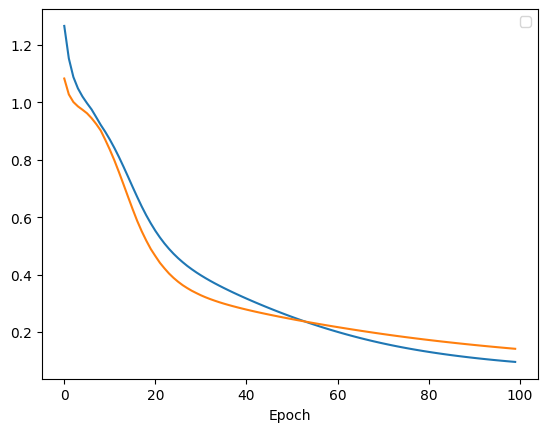

In [339]:
graphs.graph_loss(num_epochs, train_losses, validate_losses)

In [340]:
correct, total = evaluate_model.test_model(model, test_dataloader)

In [341]:
# Save our NN Model
torch.save(model.state_dict(), 'simple_neural_network.pt')
     

In [342]:
# Load the Saved Model
new_model = models.Model()
new_model.load_state_dict(torch.load('simple_neural_network.pt'))

<All keys matched successfully>

In [343]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)